# Name: - L PRATHYUSHA

# Reg no: - 19111344

# <font size="5">CIA-3

# <font size="4"><font color=ombre>Group B-Weather data

# <font color=ombre>ANALYSIS OF THE WEATHER DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg

!install pdarima
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
!pip install textblob
from textblob import TextBlob

# <Font size="5"><font color="red">WEATHER DATASET Analysis Contents
1. loading and inspecting the data
2. data cleaning
3. framing Questions and solutions
4. Time series (plots, ADFULLER test for stationary, SARIMAX, partial and Autocorrelation, Auto Regression)
5. data analysis (analysis of every plot and graph is explained properly)
6. ARIMA model (installing pdarima, auto_arima and i did the analysis)
7. Sentimental Analysis
7. conclusion and learnings

# <font size="4"><font color=green>Graphs included: - barplot, histogram, pairplot, displot, heatmap, boxplot, joint plot(hex,reg,kde), relplot, pointplot, countplot, stripplot

<font size="3">Loading the csv data

A CSV file (Comma Separated Values file) is a type of plain text file that uses specific structuring to arrange tabular data.
1. pandas recognized that the first line of the CSV contained column names, and used them automatically.
2. pandas is also using zero-based integer indices in the DataFrame. That’s because we didn’t tell it what our index should be.

# <font size="5"><font color=red> PART 1: - Loading and inspecting the data

In [2]:
data=pd.read_csv('C:/Users/Prathyu Lachireddy/Desktop/weatherHistory.csv')
data.head(8)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.


In [12]:
# loading the head and tail data

data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
data.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


# <font size="5"> <font color=red> PART 2: - Data Cleaning

In [3]:
data.shape

(96453, 12)

In [70]:
len(data)

96453

In [4]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [7]:
#This shows the all the titles of the data since this is a huge data to deal with, this code will be really helpful to analyze later.
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [24]:
#isnull() function detect missing values in the given series object.
#It return a boolean same-sized object indicating if the values are NA.
#Missing values gets mapped to True and non-missing value gets mapped to False .

import numpy as np
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [25]:
#data.fillna(method='ffill')

null_values=data.fillna(np.mean(data))
null_values

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


# <font size="5"><font color=red> PART 3: - Solutions to few questions 

# <font size="4">1. Lowest temperature recorded in the given data?; mean values?

In [8]:
# i am trying to extract infomation from the weather data where it can show the lowest temperature that is recorded.
# The result shows that the lowest temperature that is recorded in this particular part of the world if -21.822(-22 degrees).
# -22 degrees is freezing cold, i did that by finding the lowest and the minimum value in the temperature(c) column.

data["Temperature (C)"].min()

-21.822222222222226

In [9]:
# this shows the mean which is nothing but the average value of the  temperature data though out the whole data of 96453 rows.
# the result is saying that the average temperature in this area is 11 degrees.

mean1 = data['Temperature (C)'].mean()
mean1

11.932678437511868

In [10]:
# the apparent temperature means the estimated temperature by analysing, but this is just an prediction by the humans on the temp.
# The result shows the mean for this is 10.85 degrees (11 degrees) which is close to the real outcome.
# then this data is relevant and trustable

mean2 = data['Apparent Temperature (C)'].mean()
mean2

10.855028874166726

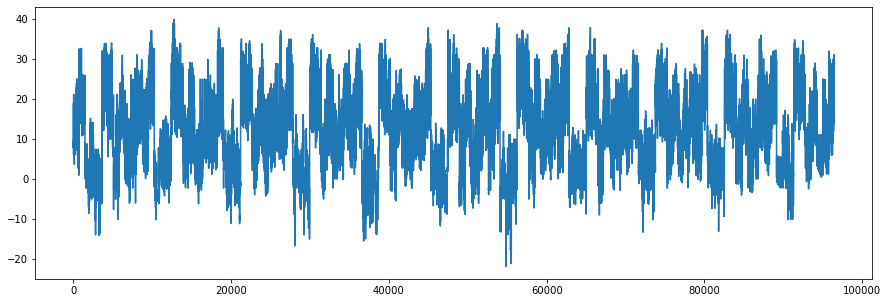

In [28]:
#the graph shows that variations in the temperature in the due course of time.
#it can be observed that in this particular part of the world where we are analysing the lowest temperature recorded are given.
#like there are many instances that the temperature is showing below 0 degrees which is cold.

import matplotlib.pyplot as plt
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
data['Temperature (C)'].plot()
plt.show()

# <font size="4">2. Unique Values

In [12]:
#nunique() function return number of unique elements in the object. 
#It returns a scalar value which is the count of all the unique values in the Index. 
data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [13]:
data['Wind Speed (km/h)'].nunique()

2484

# <font size="4">3. Finding the values that show when exactly 'the weather was clear'?

In [14]:
# this shows the the number of numerical data is there under each of the categories in the summary column in the data.

#value_counts()
data.Summary.value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [87]:
#This code will display only the clear weather
#filtering
#data.head(2)
data[data.Summary == 'Clear']

#or

#groupby()
#data.head(2)
data.groupby('Summary').get_group('Clear')

#Here we are taking all the Clear weather data values from the summary in the weather data to check if there were any days.
# if there was clear weather for a person to go out.

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
223,2006-04-18 07:00:00.000 +0200,Clear,rain,8.688889,8.688889,0.93,1.4329,290.0,5.8443,0.0,1012.96,Partly cloudy until night.
309,2006-04-20 21:00:00.000 +0200,Clear,rain,12.266667,12.266667,0.99,8.0500,320.0,6.1985,0.0,1015.76,Foggy starting overnight continuing until morn...
337,2006-04-22 01:00:00.000 +0200,Clear,rain,9.355556,8.633333,0.96,6.4239,321.0,3.3649,0.0,1017.56,Foggy starting overnight continuing until morn...
338,2006-04-22 02:00:00.000 +0200,Clear,rain,9.861111,9.861111,0.96,3.2361,319.0,4.4597,0.0,1016.16,Foggy starting overnight continuing until morn...
357,2006-04-22 21:00:00.000 +0200,Clear,rain,12.494444,12.494444,0.91,3.9445,197.0,9.9820,0.0,1015.51,Foggy starting overnight continuing until morn...
...,...,...,...,...,...,...,...,...,...,...,...,...
96432,2016-09-09 03:00:00.000 +0200,Clear,rain,15.594444,15.594444,0.87,3.2844,41.0,15.4399,0.0,1014.52,Partly cloudy starting in the morning.
96433,2016-09-09 04:00:00.000 +0200,Clear,rain,15.011111,15.011111,0.93,3.2039,341.0,15.8263,0.0,1014.37,Partly cloudy starting in the morning.
96434,2016-09-09 05:00:00.000 +0200,Clear,rain,15.016667,15.016667,0.90,2.7048,359.0,14.9569,0.0,1014.55,Partly cloudy starting in the morning.
96435,2016-09-09 06:00:00.000 +0200,Clear,rain,13.872222,13.872222,0.93,4.7495,0.0,15.8263,0.0,1014.66,Partly cloudy starting in the morning.


# <font size="4">4. Rename the 'daily summary' column to 'Weather condition'.

In [92]:
#here i am displaying only the first five rows of the weather data.
#it could be observed that the last column is now renamed as 'Weather condition'
D=data.head(5)

D.rename(columns = {'Daily Summary': 'Weather condition'})

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Weather condition
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# <font size="4">5. show that the weather is 'clear' and the humidity is greater than 0.95.

In [102]:
# we need to observe that in order to snow the temperature that is recorded should be negative.
data[(data['Summary']=='Clear') & (data['Humidity'] > 0.95)]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
309,2006-04-20 21:00:00.000 +0200,Clear,rain,12.266667,12.266667,0.99,8.0500,320.0,6.1985,0.0,1015.76,Foggy starting overnight continuing until morn...
337,2006-04-22 01:00:00.000 +0200,Clear,rain,9.355556,8.633333,0.96,6.4239,321.0,3.3649,0.0,1017.56,Foggy starting overnight continuing until morn...
338,2006-04-22 02:00:00.000 +0200,Clear,rain,9.861111,9.861111,0.96,3.2361,319.0,4.4597,0.0,1016.16,Foggy starting overnight continuing until morn...
363,2006-04-23 03:00:00.000 +0200,Clear,rain,9.355556,9.355556,0.96,1.5295,100.0,4.0250,0.0,1015.82,Foggy in the morning.
391,2006-04-24 07:00:00.000 +0200,Clear,rain,10.911111,10.911111,0.99,1.6100,210.0,4.1216,0.0,1018.62,Partly cloudy until evening.
...,...,...,...,...,...,...,...,...,...,...,...,...
96146,2016-09-25 05:00:00.000 +0200,Clear,rain,8.800000,8.116667,0.96,5.9731,351.0,8.2593,0.0,1023.07,Mostly cloudy until night.
96147,2016-09-25 06:00:00.000 +0200,Clear,rain,7.777778,7.777778,0.96,4.6207,0.0,3.2844,0.0,1023.71,Mostly cloudy until night.
96172,2016-09-26 07:00:00.000 +0200,Clear,rain,7.805556,7.311111,0.96,4.8944,323.0,15.1340,0.0,1021.08,Partly cloudy until night.
96216,2016-09-28 03:00:00.000 +0200,Clear,rain,6.622222,6.622222,0.96,0.3542,290.0,14.9086,0.0,1028.64,Partly cloudy starting in the afternoon.


# <font size="5"><font color=red>PART 4: - Time series
Time series analysis is a statistical technique that deals with time series data, or trend analysis. Time series data means that data is in a series of particular time periods or intervals. 

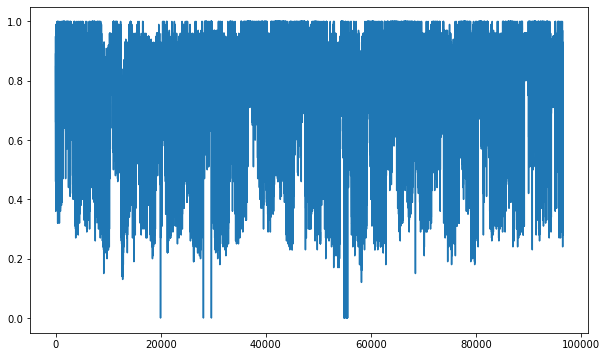

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.plot(timeseries['Humidity'])

In [18]:
timeseries['Date']=pd.to_datetime(data['Formatted Date'])

<function matplotlib.pyplot.show(close=None, block=None)>

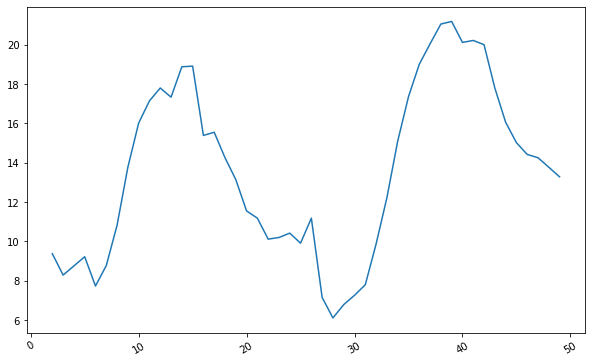

In [26]:
#Moving average
#A simple moving average (SMA) is a calculation that takes the arithmetic mean,of a given set of prices
# over the specific number of days in the past

plt.plot(data[1:50]['Temperature (C)'])
plt.xticks(rotation=30)
plt.show

In [27]:
#rolling average transform
rollingseries=data[1:50].rolling(window=5)

rollingmean=rollingseries.mean()

print(rollingmean.head(10))

    Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
2               NaN                       NaN       NaN                NaN   
3               NaN                       NaN       NaN                NaN   
4               NaN                       NaN       NaN                NaN   
5               NaN                       NaN       NaN                NaN   
6          8.675556                  6.986667     0.870           11.08002   
7          8.554444                  6.416667     0.870           13.12472   
8          9.061111                  7.392222     0.868           12.56766   
9         10.064444                  8.751111     0.846           12.86390   
10        11.423333                 10.532222     0.810           13.58518   
11        13.305556                 12.856667     0.728           15.06960   

    Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  
2                      NaN              NaN         NaN      

<font size="3">A moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean (MM) or rolling mean and is a type of finite impulse response filter.

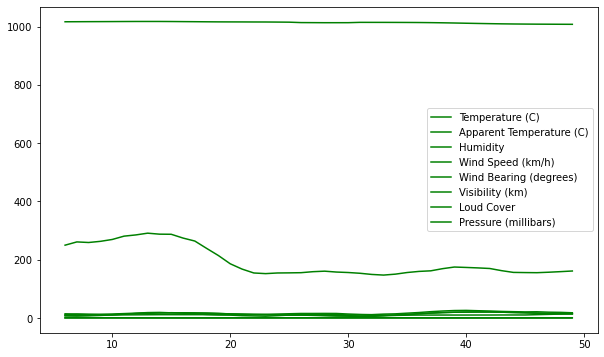

In [30]:
rollingmean.plot(color='green')
pyplot.show()

In [ ]:
#Additive model is used when the variance of the time series doesn't change over different values of the time series.
#On the other hand, 
#if the variance is higher when the time series is higher then it often means we should use a multiplicative models.

mul_result=seasonal_decompose(timeseries['Wind Speed (km/h)'],model="multiplicative",freq=1)

type(timeseries)
add_result=seasonal_decompose(timeseries['Wind Speed (km/h)'],model="additive",freq=1)

plt.rcParams.update({'figure.figsize':(10,10)})

mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

## ADFULLER test for stationary

In [20]:
from statsmodels.tsa.stattools import adfuller

data.head(2)

adfuller_result=adfuller(data.Humidity.values,autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')


for key,Humidity in adfuller_result[4].items():
    
    print('Critical Values:')
    print(f' {key},{Humidity}')

ADF Statistic: -15.795917585436289
p-value: 1.0882942157158304e-28
Critical Values:
 1%,-3.430417847426096
Critical Values:
 5%,-2.8615699874869773
Critical Values:
 10%,-2.5667859612921466


## SARIMAX: -
Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models. Intuitively, ARIMA models compose 2 parts: the autoregressive term (AR) and the moving-average term (MA). The former views the value at one time just as a weighted sum of past values.

In [ ]:
D1=data.head(5)
D1

In [ ]:
sarimax_model= SARIMAX(D1['Temperature (C)'],order=(1,1,1),seasonal_order=(1,1,1,4),exog=D1['Humidity'])

In [ ]:
res=sarimax_model.fit(disp=False)

In [17]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                   Temperature (C)   No. Observations:                    5
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                   0.000
Date:                           Mon, 26 Apr 2021   AIC                             12.000
Time:                                   12:16:01   BIC                               -inf
Sample:                                        0   HQIC                               nan
                                             - 5                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Humidity            0        nan        nan        nan         nan         nan
ar.L1               0        nan        nan        nan         nan         nan
ma.L1               0        nan        nan        nan         nan         nan
ar.S.L4             0        nan        nan        nan         nan         nan
ma.S.L4             0        nan        nan        nan         nan         nan
sigma2         1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(heat)

<AxesSubplot:>

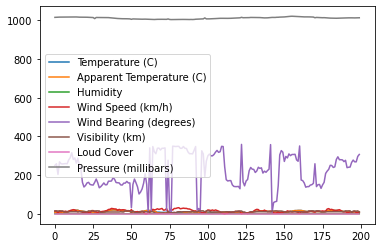

In [44]:
data[:200].plot()

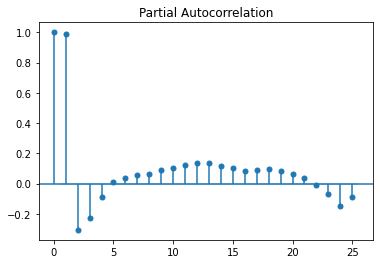

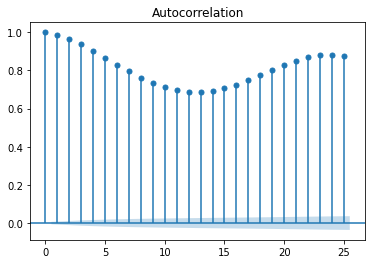

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(data['Temperature (C)'],lags=25)
acf=plot_acf(data['Temperature (C)'],lags=25)

#x- axis= time
#y- axis= Correlation
#higher the value the more the correlation in the data and the time.
#partial sees on the direct effect(previous and current time lag) and autocorrelation will see into indirect effects.

In [50]:
pred=model.predict(start=len(train),end=len(x)-1,dyamic=False)

NameError: name 'model' is not defined

In [64]:
from statsmodels.tsa.ar_model import AutoReg
X=data.Humidity
train=X[:len(X)-7]
test=X[len(X)-7:]

model=AutoReg(train,lags=10).fit()

print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:               Humidity   No. Observations:                96446
Model:                    AutoReg(10)   Log Likelihood              133695.186
Method:               Conditional MLE   S.D. of innovations              0.060
Date:                Mon, 26 Apr 2021   AIC                             -5.610
Time:                        12:53:22   BIC                             -5.609
Sample:                            10   HQIC                            -5.610
                                96446                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0689      0.001     69.987      0.000       0.067       0.071
Humidity.L1      1.0223      0.003    317.696      0.000       1.016       1.029
Humidity.L2      0.0835      0.005     18.13

# <font size="5"><font color=red>PART 5: - DATA VISUALISATION

# Bar plot

In [5]:
D2=data[0:1000]

here i am trying to show the bar graph while comparing the humidity and temperature in the environment and i have loaded the first 1000 rows of the data so that the graph is depicted properly with the sample size of 1000


C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity', ylabel='Temperature (C)'>

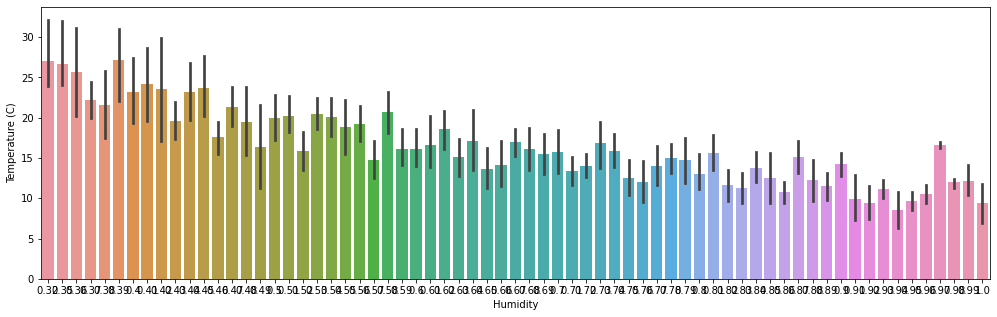

In [6]:
# from the result we can see that on the x-axis we have humdity and on the y-axis we have temperature (C)
# when the humity level is at 0.3 then the temperature recorded is the highest where here it shows that the temperature can,
# go anywhere between 25-30 degree celsius, also when the humity when is at its highest then the temperature is at its lowest.
# like when it is at 0.9 then the temperature is between 10-15 degree celsius.

fig_dims = (17, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(D2['Humidity'],D2['Temperature (C)'])

# Histogram

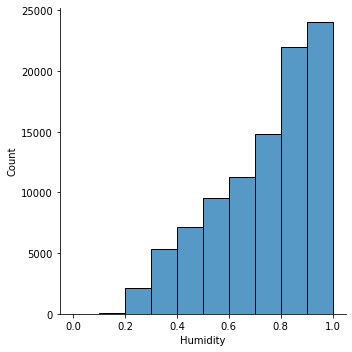

In [59]:
#distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. 
#distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data 
#i.e. data distribution of a variable against the density distribution.
#The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.
#the bin size shows the number of bars that are being ploted

sns.displot(data['Humidity'],bins=10)

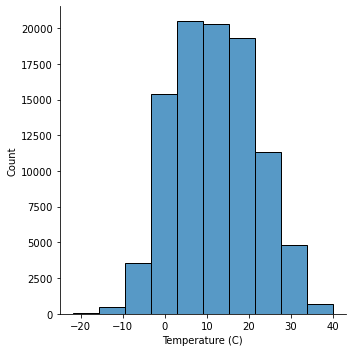

In [105]:
sns.displot(data['Temperature (C)'],bins=10)

# Heat Map
heatmap uses colored cells, typically in a single base color hue and extended using its shades, tones, and tints like shades of blue from light to dark. It shows a relative number of events for each day in a calendar view. Days are arranged into columns by week and grouped by month and years. That enables you to quickly recognize daily and weekly patterns.

In [ ]:
heat=data.drop(['Humidity','Loud Cover','Daily Summary','Pressure (millibars)'],axis=1)
heat

In [85]:
correlation=heat.corr()
correlation

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km)
Temperature (C),1.000000,0.992629,0.008957,0.029988,0.392847
Apparent Temperature (C),0.992629,1.000000,-0.056650,0.029031,0.381718
Wind Speed (km/h),0.008957,-0.056650,1.000000,0.103822,0.100749
Wind Bearing (degrees),0.029988,0.029031,0.103822,1.000000,0.047594
Visibility (km),0.392847,0.381718,0.100749,0.047594,1.000000


<AxesSubplot:>

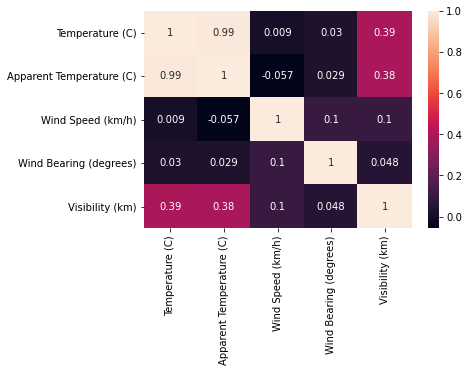

In [86]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [ ]:
x=data['Wind Speed (km/h)']
y=data['Wind Bearing (degrees)']

plt.pie(y,
        labels=x,
        radius=2,
       autopct='%0.2f%%',
       shadow=True,
       explode=[0.5,0.1,0.2,0.9,0])

# Seaborn plot

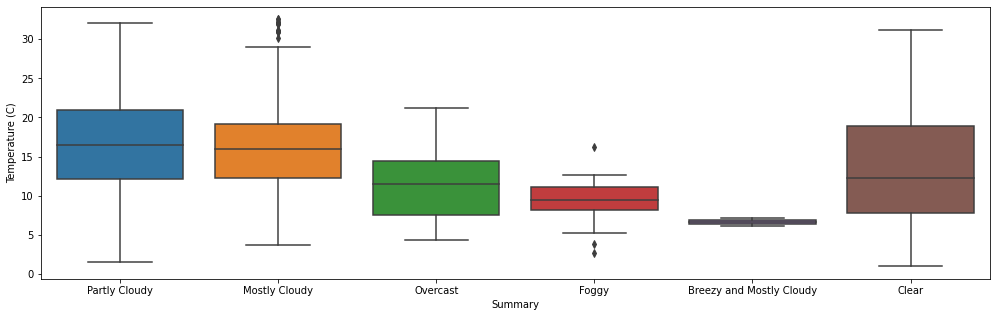

In [8]:
P=data.head(1000)
fig_dims = (17, 5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.boxplot(data=P, x='Summary',y='Temperature (C)')
plt.show()

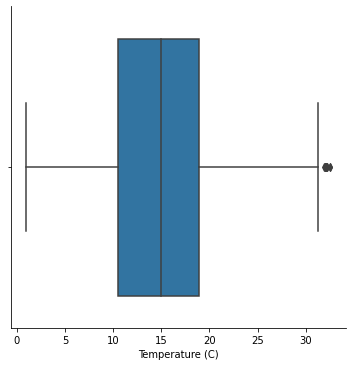

In [65]:
sns.catplot(x='Temperature (C)', kind='box',data=D2)

ANALYSIS for boxplot: - A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1) divided 25%, median, third quartile (Q3) upper 25% , and “maximum”). the box plot which is shown above depicts the temperature in the weather data and it is observed that the left line(wisker) shows the lower point which is between 0-5 and the median here is 15 degrees in temperature. Boxplots do really help us to understand the quartiles part of the data. the right wisker shows the highest temperature recorded which is 30 degrees. but the points which are places ouside the line are known as the outliers of the data where in this case the rare recorded temperatures in a particular geographic area.

C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity', ylabel='Temperature (C)'>

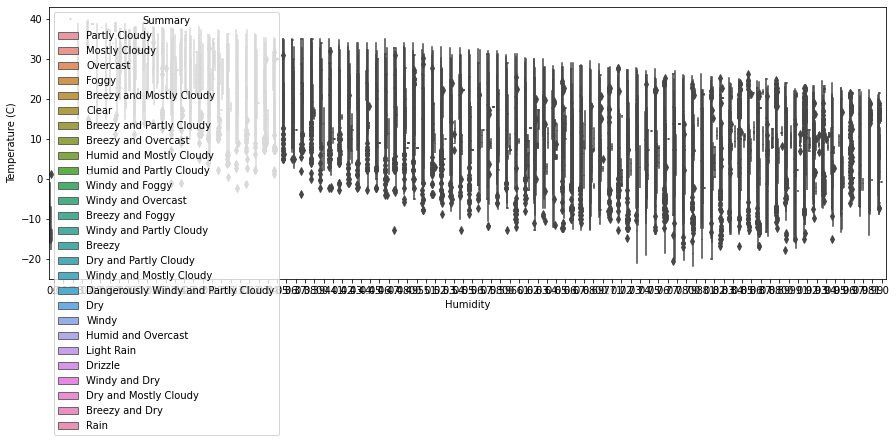

In [22]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data['Humidity'],data['Temperature (C)'],hue=data['Summary'],ax=ax)

C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity', ylabel='Temperature (C)'>

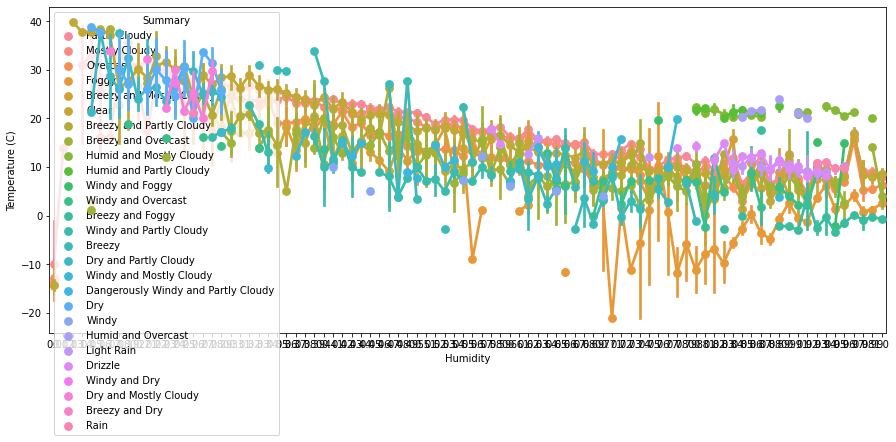

In [19]:
#point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points 
#provides some indication of the uncertainty around that estimate using error bars.

# ANALYSIS: - Variable 1: - humidity and variable 2: - temperature
# this graph shows the points of the two variables that are being chosen in different various weather conditions.

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(data['Humidity'],data['Temperature (C)'],hue=data['Summary'],ax=ax)

In [32]:
# by using the .drop function we can eliminate few columns from the data and then we can analyse the data.

Weather=data.drop(['Loud Cover','Daily Summary','Apparent Temperature (C)','Pressure (millibars)','Visibility (km)','Wind Bearing (degrees)'],axis=1)
Weather

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446
...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,0.43,10.9963
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,0.48,10.0947
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,0.56,8.9838
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,0.60,10.5294


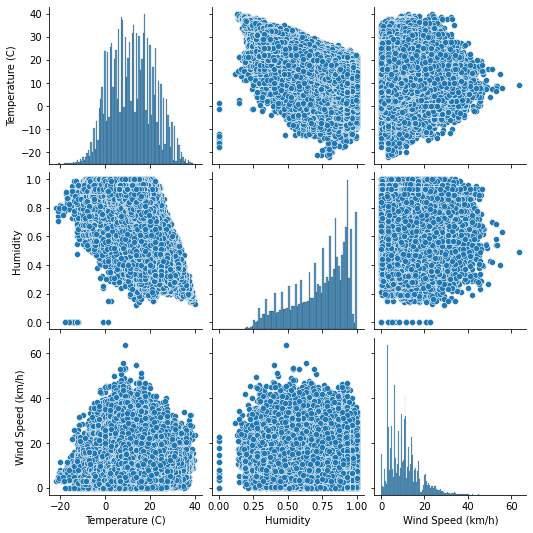

In [47]:
import seaborn as sns

sns.pairplot(Weather)

ANALYSIS (Pairplot) : -

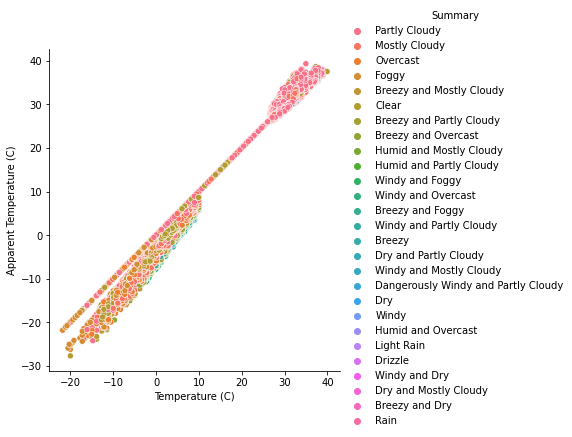

In [36]:
# the pairplot that i have displayed here shows that on the x-axis we have temperature(C) and on y-axis we have appartent temp(c).
# it could be observed that when the temperature is low then the initial summary values met the condition.
# like when the temperature is at -10 and the apparent temp is at -20 then there is a lot of clustering of the summary values.
# values like partly cloudy, windly, breezy etc could be observed in the lowest and highest recorded temperatures.
# the same could be observed that lowest and highest recorded temperature (lowest=-10 to 0 degrees(c), 
# highest=(30 to 40 degrees(c)))
# as at normal temperature like 20 degrees(c), then there are not much conditions.
# where we can conclude then there will be many weather conditons that will be observed at extreme temperatures.


sns.relplot(x='Temperature (C)',y='Apparent Temperature (C)',hue='Summary',data=Weather)

ANALYSIS: -the graphs depicts the graphical representation between aparent and temperature. This is a figure-level function for visualizing statistical relationships using two common approaches. Scatter Plots- Each plot point is an independent observation, every colour depicts a differernt weather condition in the Summary data 

so, it could be observed that partly cloudy, mostly cloudy, overcast all of these are the occuring when the temperature is low. if the temperature is low as 10 to -20 then these type of weather conditions are occuring. on contray. it either rains, breezy, cloudy, dry and windy type of weather occurs when the temperature is comparitively high that is between 30 to 40 or more degrees of temperature.

C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Summary', ylabel='count'>

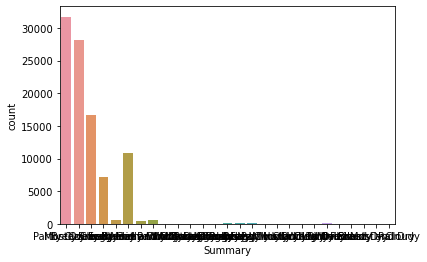

In [30]:
sns.countplot(data['Summary'])

it Shows the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.


JOINT PLOTS

C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


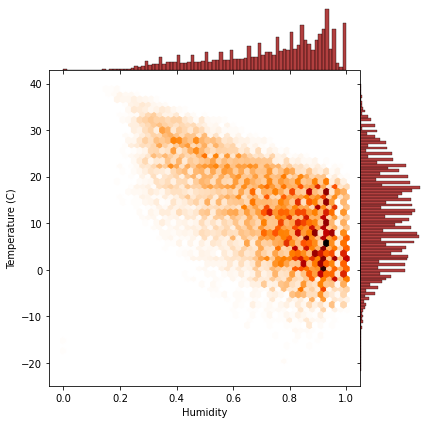

In [83]:
cmap=plt.cm.gist_heat_r
sns.jointplot(data['Humidity'],data['Temperature (C)'],kind="hex",space=0, color=cmap(.6), cmap=cmap)

kind="hex" will use matplotlib.axes.Axes.hexbin() to compute a bivariate histogram using hexagonal bins. Along with which we can observe that there is histogram that is being depicted on the top and the right sides of the graph. we have chosen 2 variables which are temperature and humidity. the default colour was blue and by adding "space=0, color=cmap(.6), cmap=cmap", this code we can change the colour according to the hex code of the colour.The histogram on the top shows the distribution of the variable at the x-axis (humidity) and the histogram to the right shows the distribution of the variable at the y-axis(temperature).

C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


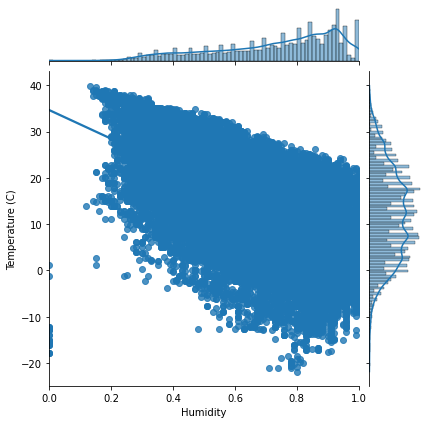

In [26]:
#in this jointplot we can see that the kind is regression and the line shows the line of best fit and we can see the values
#It is very helpful to have univariate and bivariate plots together in one figure.

sns.jointplot(data['Humidity'],data['Temperature (C)'],kind="reg")

C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


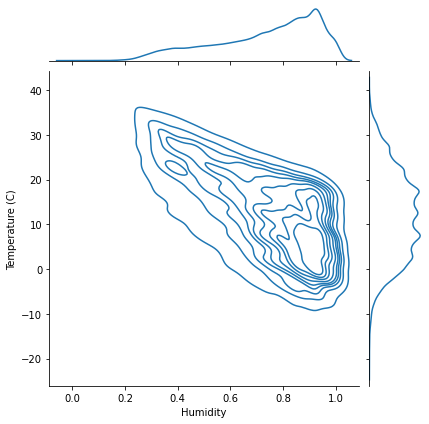

In [42]:
sns.jointplot(data['Humidity'],data['Temperature (C)'],kind="kde")

STRIP PLOT

C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Summary', ylabel='Temperature (C)'>

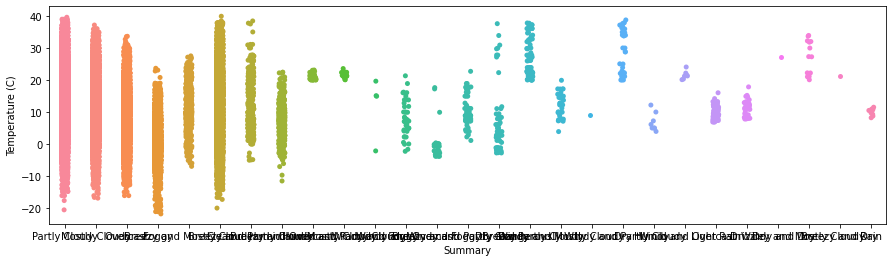

In [37]:
# this shows the clustering of the most repeated weather conditons in the weather data.
# the most crowded one with most of the values is partly cloudly and mostly cloudy. 
# where we can conclude that these are the two weather conditions that were observed when there is temperature change
# these two conditons are crowded especially near 10 -15 degrees celsius.
# and the foggy condition is found when the temperature drops below to 10 degrees.

fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(data['Summary'],data['Temperature (C)'])

Analysis: -the graph shows the data where it is placed according to the category which is given in the 'SUMMARY' of the csv data that i have loaded. it yet shows that these are the number of values in a particular category like 'partly cloudly' according to the temperature. it shows how crowded that one particular category is.


C:\Users\Prathyu Lachireddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Summary', ylabel='Temperature (C)'>

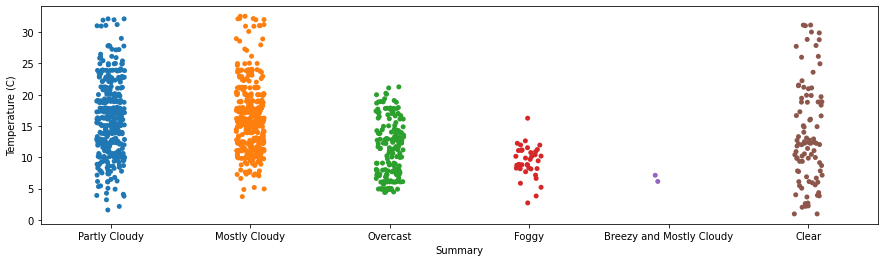

In [23]:
# with the first 1000 rows of the data.
# this shows the clustering of the most repeated weather conditons in the weather data.
# the most crowded one with most of the values is partly cloudly and mostly cloudy. 
# where we can conclude that these are the two weather conditions that were observed when there is temperature change
# these two conditons are crowded especially near 10 -15 degrees celsius.
# and the foggy condition is found when the temperature drops below to 10 degrees.

fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(D2['Summary'],D2['Temperature (C)'])

# <font size="5"><font color=red>PART 6: - ARIMA Model
### Autoregressive Integrated Moving Average Model. An ARIMA model is a class of statistical models for analyzing and forecasting time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

In [24]:
!pip install pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA

In [49]:
stepwise_fit= auto_arima(data['Temperature (C)'],trace=True,
                        suppress_warnings=True)

stepwise_fit

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=161.944, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=276.186, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=178.223, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=225.804, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=385.767, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=171.274, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=160.173, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=171.279, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=166.392, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=161.820, Time=0.37 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=165.170, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=170.511, Time=0.08 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.806 seconds


ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)

<font size="3">Analysis of Auto Arima: - It takes into account the AIC and BIC values generated (as you can see in the code) to determine the best combination of parameters. AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are estimators to compare models. The lower these values, the better is the model.

In [36]:
print(data.shape)
train=data.loc[:-10]
test=data.loc[-20:]

print(train.shape,test.shape)

(96453, 12)
(0, 12) (96453, 12)


In [ ]:
model=ARIMA(train['Temperature (C)'],order=(2,0,12))
model=model.fit()
model.Summary

# <font size="5"><font color=red>PART 8: - Sentimental Analysis: -
Sentiment analysis is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information.

In [22]:
from textblob import TextBlob
type1="Summary"
type2="Wind Speed (km/h)"
blob1= TextBlob(type1)
blob2=TextBlob(type2)
print(blob1.sentiment)
print(blob2.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


Analysis: -The TextBlob package for Python is a convenient way to do a lot of Natural Language Processing (NLP) tasks.Recognizing “very” as a modifier word, TextBlob will ignore polarity and subjectivity and just use intensity to modify.  The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. Let’s use this now to get the sentiment polarity and labels for each news article and aggregate the summary statistics per news category.

<AxesSubplot:xlabel='Humidity'>

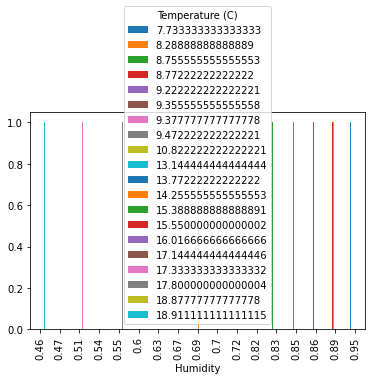

In [7]:
P=data.head(20)
airline_sentiment = P.groupby(['Humidity', 'Temperature (C)']).Summary.count().unstack()
airline_sentiment.plot(kind='bar')

# <font size="5"><font color=red>PART 8: - Conclusion

Here, in this assignment i have included all the concepts of cleaning, panfas, using all the plots and with some research i have understood additional plots like jointplots and different categories among them. like: -

1. basic operations like loading the csv data in the form of the dataframe in Jupyter notebook
2. dataframe and cleaning the data
3. Basic data inspections(head, tail,dtypes,nunique ,accessing columns and rows, sorting, filtering)
4. Groupby funtions (count, groupby, nunique)
5. Plots(barplot, histogram, pairplot, displot, heatmap, boxplot, joint plot(hex,reg,kde), relplot, pointplot, countplot,     stripplot)

To conclude i would like to say that this assignment has helped me analyse and interpret the real time data set and i have learnt on how does a real data is interpreted. i would like to talk about the importance of analytics, Analytics allow you to quantify the effects of making a change to your marketing strategy, and that's invaluable to the process of improving and optimizing online marketing campaigns. The biggest benefit of utilizing proper analytics is being able to identify strengths and weaknesses. For example, let’s say you run a blog for your car detailing business. You’re just starting out, and aren’t sure what kinds of posts will bring you the most traffic, or provide the most value to your readers. If you’re using analytics, you’ll be able to measure which blog posts attract the most traffic, which get the least traffic, which have a high bounce rate, a low bounce rate, and so on. It will be easy to tell which blog posts are performing better or worse than others. since i had to develop everything from the base data it was very insightful as it totally was interpretation based. this kind of interpretation would be used even in the real organisation the key idea is to collect data about the organization and use them to improve operations. Raw form of data is not of any use.If you are trying to bring any significant improvement in your business, then analytics is your best bet to bring about an informed transformation.

## THANK YOU